In [ ]:
import pandas as pd
df = pd.read_csv('finaldata(2).csv')
df

,sym_id,symptom,disease,diagnosis,treatment
0,1,"A lump on the roof of the mouth, under the ton...",AdenoidCysticCarcinoma,"Biopsy,MRI scan,CT scan,pet-ct scan.","Surgery,External-beam radiation therapy,Neutro..."
1,2,An abnormal area on the lining of the mouth,AdenoidCysticCarcinoma,"Biopsy,MRI scan,CT scan,pet-ct scan.","Surgery,External-beam radiation therapy,Neutro..."
2,3,"Numbness of the upper jaw, palate, face, or to...",AdenoidCysticCarcinoma,"Biopsy,MRI scan,CT scan,pet-ct scan.","Surgery,External-beam radiation therapy,Neutro..."
3,4,Difficulty swallowing,AdenoidCysticCarcinoma,"Biopsy,MRI scan,CT scan,pet-ct scan.","Surgery,External-beam radiation therapy,Neutro..."
4,5,Hoarseness,AdenoidCysticCarcinoma,"Biopsy,MRI scan,CT scan,pet-ct scan.","Surgery,External-beam radiation therapy,Neutro..."
...,...,...,...,...,...
377,377,"Persistent itching, pain, soreness, or burning...",Vulvar Cancer,"Biopsy,Colposcopy,Chest x-ray,Computed tomogra...","Vulvectomy,Radical local excision of the vulva..."
378,378,Painful urination,Vulvar Cancer,"Biopsy,Colposcopy,Chest x-ray,Computed tomogra...","Vulvectomy,Radical local excision of the vulva..."
379,379,Bleeding or discharge that is not menstrual blood,Vulvar Cancer,"Biopsy,Colposcopy,Chest x-ray,Computed tomogra...","Vulvectomy,Radical local excision of the vulva..."
380,380,"An ulcer, open wound, or cut that persists for...",Vulvar Cancer,"Biopsy,Colposcopy,Chest x-ray,Computed tomogra...","Vulvectomy,Radical local excision of the vulva..."


In [ ]:
df.isnull().sum()

sym_id       0
symptom      0
disease      0
diagnosis    0
treatment    5
dtype: int64

In [ ]:
df = df.fillna("nothing")

In [ ]:
df.isnull().sum()

sym_id       0
symptom      0
disease      0
diagnosis    0
treatment    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sym_id     382 non-null    int64 
 1   symptom    382 non-null    object
 2   disease    382 non-null    object
 3   diagnosis  382 non-null    object
 4   treatment  382 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.0+ KB


In [ ]:
from io import StringIO
col = ['symptom', 'disease']
df = df[col]
df = df[pd.notnull(df['symptom'])]
df.columns = ['symptom', 'disease']
df['category_id'] = df['disease'].factorize()[0]
category_id_df = df[['disease', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'disease']].values)
df.tail()

,symptom,disease,category_id
377,"Persistent itching, pain, soreness, or burning...",Vulvar Cancer,42
378,Painful urination,Vulvar Cancer,42
379,Bleeding or discharge that is not menstrual blood,Vulvar Cancer,42
380,"An ulcer, open wound, or cut that persists for...",Vulvar Cancer,42
381,Wart-like growths that are similar to genital ...,Vulvar Cancer,42


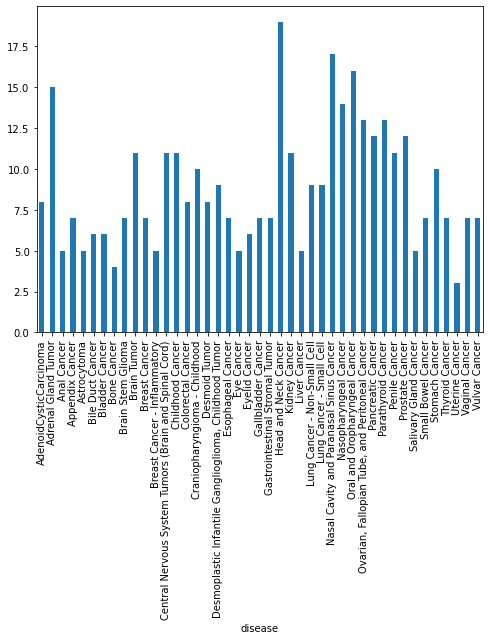

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('disease').symptom.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.symptom).toarray()
labels = df.category_id
features.shape

(382, 75)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for disease, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(disease))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

# 'AdenoidCysticCarcinoma':
  . Most correlated unigrams:
. tongue
. jaw
  . Most correlated bigrams:
. unexplained weight
. weight loss
# 'Adrenal Gland Tumor':
  . Most correlated unigrams:
. pressure
. abdominal
  . Most correlated bigrams:
. loss appetite
. abdominal pain
# 'Anal Cancer':
  . Most correlated unigrams:
. area
. discharge
  . Most correlated bigrams:
. unexplained weight
. weight loss
# 'Appendix Cancer':
  . Most correlated unigrams:
. increased
. abdomen
  . Most correlated bigrams:
. unexplained weight
. weight loss
# 'Astrocytoma':
  . Most correlated unigrams:
. growth
. headaches
  . Most correlated bigrams:
. unexplained weight
. weight loss
# 'Bile Duct Cancer':
  . Most correlated unigrams:
. caused
. fever
  . Most correlated bigrams:
. loss appetite
. abdominal pain
# 'Bladder Cancer':
  . Most correlated unigrams:
. feeling
. urine
  . Most correlated bigrams:
. unexplained weight
. weight loss
# 'Bone Cancer':
  . Most correlated unigrams:
. fever
. swel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['symptom'], df['disease'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
s=("painful urination")

In [ ]:
d=clf.predict(count_vect.transform([s]))

In [ ]:
d=list(d)
d

['Vulvar Cancer']

In [ ]:
type(s)

str

In [ ]:
import pickle

In [ ]:
filename = 'cancer_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('cancer_model.sav', 'rb'))

In [ ]:
prediction = loaded_model.predict(count_vect.transform(['painful urination']))
print(prediction)

['Vulvar Cancer']


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


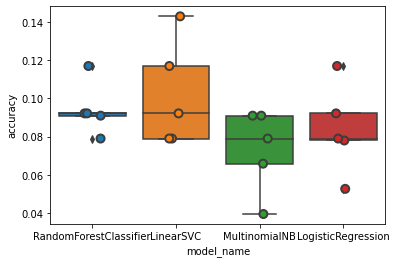

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.101948
LogisticRegression        0.083698
MultinomialNB             0.073206
RandomForestClassifier    0.094190
Name: accuracy, dtype: float64

In [ ]:
import plotly.express as px

# Here we use a column with categorical data
fig = px.histogram(df['category_id'], x=df['disease'], color_discrete_sequence=['indianred'] )
fig.show()

(-0.5, 399.5, 199.5, -0.5)

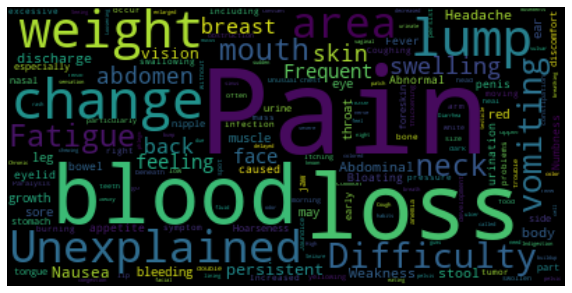

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
text =  " ".join(title for title in df.symptom)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)
# Display the generated Word Cloud
fig = plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")